In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_excel("iris.xls")
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Axes: >

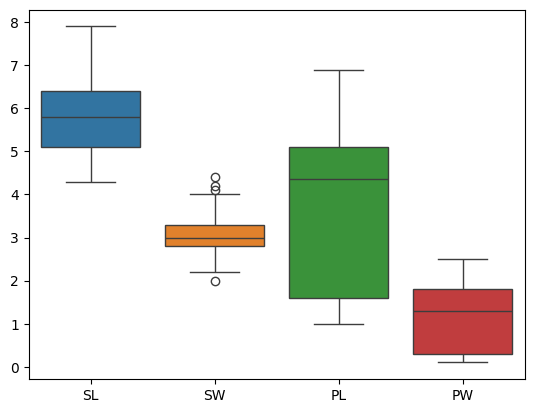

In [5]:
sns.boxplot(data)

In [6]:
q1=np.percentile(data["SW"],25)
q3=np.percentile(data["SW"],75)
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
data.loc[data["SW"] > upper_bound, "SW"] = upper_bound
data.loc[data["SW"] < lower_bound, "SW"] = lower_bound

<Axes: >

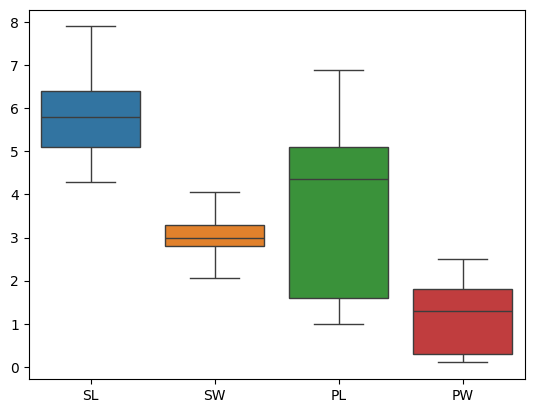

In [7]:
sns.boxplot(data)

In [8]:
X=data.drop(["Classification"],axis=1)
y=data["Classification"]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [10]:
from sklearn.feature_selection import SelectKBest,f_classif

In [11]:
k=3
selector=SelectKBest(f_classif,k=k)
sel_X_train=selector.fit_transform(X_train,y_train)
sel_X_test=selector.transform(X_test)

In [12]:
sel_X_train

array([[4.6, 1. , 0.2],
       [5.7, 1.5, 0.4],
       [6.7, 4.4, 1.4],
       [4.8, 1.6, 0.2],
       [4.4, 1.3, 0.2],
       [6.3, 5. , 1.9],
       [6.4, 4.5, 1.5],
       [5.2, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.2, 1.5, 0.1],
       [5.8, 5.1, 1.9],
       [6. , 4.5, 1.6],
       [6.7, 4.7, 1.5],
       [5.4, 1.3, 0.4],
       [5.4, 1.5, 0.2],
       [5.5, 3.7, 1. ],
       [6.3, 5.1, 1.5],
       [6.4, 5.5, 1.8],
       [6.6, 4.4, 1.4],
       [7.2, 6.1, 2.5],
       [5.7, 4.2, 1.3],
       [7.6, 6.6, 2.1],
       [5.6, 4.5, 1.5],
       [5.1, 1.4, 0.2],
       [7.7, 6.7, 2. ],
       [5.8, 4.1, 1. ],
       [5.2, 1.4, 0.2],
       [5. , 1.3, 0.3],
       [5.1, 1.9, 0.4],
       [5. , 3.5, 1. ],
       [6.3, 4.9, 1.8],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5.1, 1.7, 0.5],
       [5.6, 4.2, 1.3],
       [5.1, 1.5, 0.2],
       [5.7, 4.2, 1.2],
       [7.7, 6.7, 2.2],
       [4.6, 1.4, 0.2],
       [6.2, 4.3, 1.3],
       [5.7, 5. , 2. ],
       [5.5, 1.4

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [14]:
model=RandomForestClassifier(random_state=42)

In [16]:
model.fit(sel_X_train,y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred=model.predict(sel_X_test)

In [19]:
print("Accuracy: ",accuracy_score(y_test,y_pred))

Accuracy:  1.0
